In [1]:
#Context-Enrichment

**#Context Enrichment Window for Document Retrieval**

**Overview:** The "Context Enrichment Window" technique in document retrieval enhances the retrieval process by adding surrounding context to each retrieved chunk, improving the coherence and completeness of the returned information. This is particularly useful when working with vector databases for tasks like question-answering or summarization, where understanding the surrounding context is crucial for generating accurate and meaningful responses.

**Motivation:** Traditional vector search methods often retrieve isolated chunks of text based on semantic similarity. However, these chunks may lack necessary context, leading to incomplete or fragmented information. The context enrichment window technique mitigates this by retrieving neighboring chunks of text, thereby providing a more comprehensive view of the relevant information.

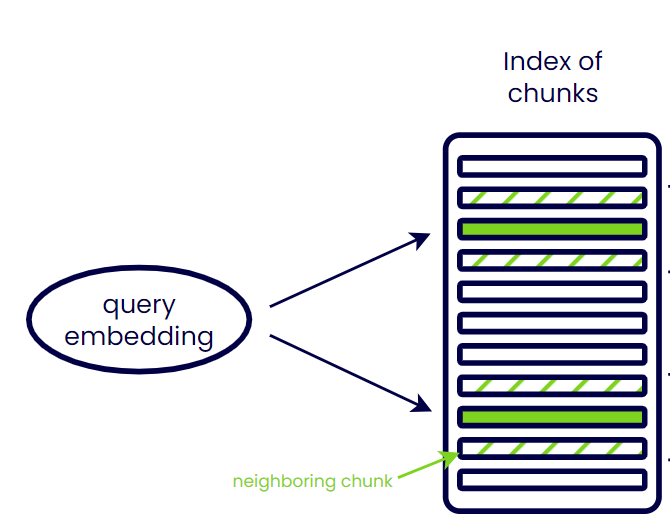

In [ ]:
import os
from sentence_transformers import SentenceTransformer
from langchain.docstore.document import Document
from langchain.vectorstores import FAISS

# Load local embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to split text into chunks with overlapping context
def split_text_to_chunks_with_indices(text: str, chunk_size: int, chunk_overlap: int):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(Document(page_content=chunk, metadata={"index": len(chunks)}))
        start += chunk_size - chunk_overlap
    return chunks

# Sample text to be split into chunks
text = "Your text goes here. This should be a large document or string loaded from a file."

# Define chunk parameters
chunk_size = 400
chunk_overlap = 200

# Split document into chunks
chunks = split_text_to_chunks_with_indices(text, chunk_size, chunk_overlap)

# Create embeddings for chunks
embeddings = [embedding_model.encode(chunk.page_content) for chunk in chunks]

# Create a FAISS vector store
vectorstore = FAISS.from_embeddings(embeddings, documents=chunks)

# Define the custom retrieval function with context enrichment
def retrieve_with_context_overlap(vectorstore, query: str, num_neighbors: int = 1):
    query_embedding = embedding_model.encode(query)
    relevant_chunks = vectorstore.similarity_search_by_vector(query_embedding, k=1)

    result_sequences = []
    for chunk in relevant_chunks:
        current_index = chunk.metadata.get('index')
        start_index = max(0, current_index - num_neighbors)
        end_index = min(len(chunks), current_index + num_neighbors + 1)

        # Concatenate the neighboring chunks
        concatenated_text = "".join([chunks[i].page_content for i in range(start_index, end_index)])
        result_sequences.append(concatenated_text)

    return result_sequences

# Example query
query = "Explain about RAG approach."
enriched_chunks = retrieve_with_context_overlap(vectorstore, query, num_neighbors=1)

# Display results
for enriched_chunk in enriched_chunks:
    print(enriched_chunk)

The context enrichment window technique provides a more comprehensive and contextually rich retrieval experience.